# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid="+weather_api_key+"&q="+city
    
    # Log the url, record, and set numbers
    # print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    city_weather = requests.get(city_url).json()
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                "Lat": city_lat, 
                "Lng": city_lng, 
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,282.62,86,3,5.14,AU,1681741879
1,mataura,-46.1927,168.8643,284.53,90,100,1.26,NZ,1681742158
2,vestmanna,62.1564,-7.1664,282.66,100,100,7.20,FO,1681742159
3,santa isabel,-23.3156,-46.2214,299.76,59,1,5.30,BR,1681742159
4,tiarei,-17.5333,-149.3333,298.16,79,66,5.26,PF,1681742160


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,282.62,86,3,5.14,AU,1681741879
1,mataura,-46.1927,168.8643,284.53,90,100,1.26,NZ,1681742158
2,vestmanna,62.1564,-7.1664,282.66,100,100,7.20,FO,1681742159
3,santa isabel,-23.3156,-46.2214,299.76,59,1,5.30,BR,1681742159
4,tiarei,-17.5333,-149.3333,298.16,79,66,5.26,PF,1681742160


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

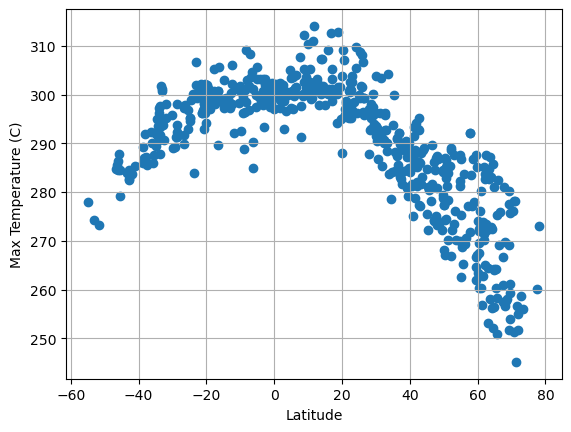

In [11]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
temp_values = city_data_df["Max Temp"]
plt.scatter(x_values,temp_values)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

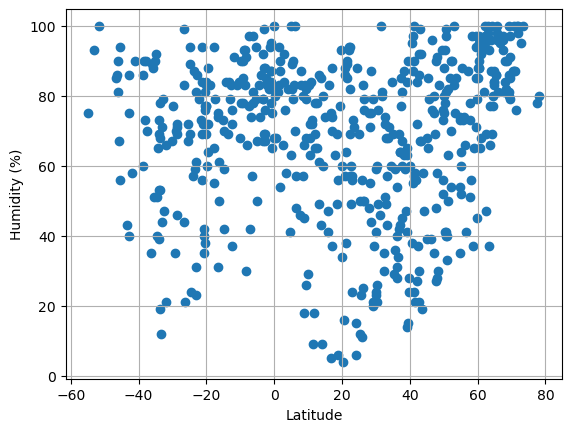

In [12]:
# Build the scatter plots for latitude vs. humidity
hum_values = city_data_df["Humidity"]
plt.scatter(x_values, hum_values)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

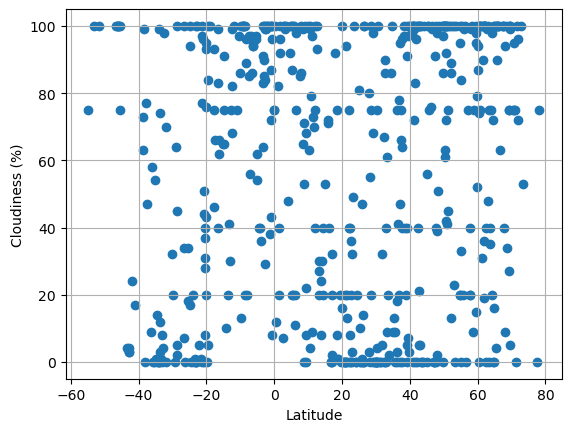

In [13]:
# Build the scatter plots for latitude vs. cloudiness
cloud_values = city_data_df["Cloudiness"]
plt.scatter(x_values, cloud_values)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

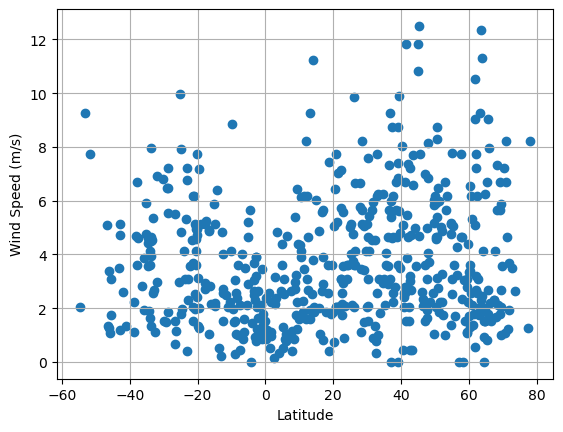

In [14]:
# Build the scatter plots for latitude vs. wind speed
wind_values = city_data_df["Wind Speed"]
plt.scatter(x_values, wind_values)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_lin_reg(x,y, xlabel="",ylabel=""):
    # slope and intercept

    coeffs = np.polyfit(x, y, 1)
    slope = coeffs[0]
    intercept = coeffs[1]
    r = np.corrcoef(x, y)[0, 1]
  
    predict = slope*x + intercept
    
    plt.scatter(x,y)
    plt.plot(x, predict, color='red')

    line_eq = f'y = {slope: .2f}x + {intercept: .2f}'
    plt.text(0.05,0.05, line_eq, transform=plt.gca().transAxes, color='red', fontsize=15)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    
    plt.show()

    return f"The r-value is: {r}"


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,vestmanna,62.1564,-7.1664,282.66,100,100,7.20,FO,1681742159
6,soyaniquilpan,19.9833,-99.5000,288.12,60,16,1.84,MX,1681742162
7,san policarpo,12.1791,125.5072,300.99,78,100,3.09,PH,1681742163
8,anadyr,64.7500,177.4833,256.43,84,0,2.00,RU,1681742163
10,kargil,34.5667,76.1000,278.55,60,86,2.92,IN,1681742165


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,282.62,86,3,5.14,AU,1681741879
1,mataura,-46.1927,168.8643,284.53,90,100,1.26,NZ,1681742158
3,santa isabel,-23.3156,-46.2214,299.76,59,1,5.30,BR,1681742159
4,tiarei,-17.5333,-149.3333,298.16,79,66,5.26,PF,1681742160
5,arraial do cabo,-22.9661,-42.0278,302.07,61,0,7.20,BR,1681741936


###  Temperature vs. Latitude Linear Regression Plot

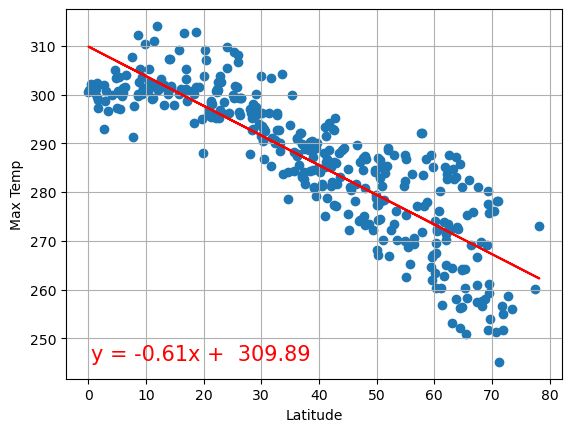

'The r-value is: -0.8601869147407223'

In [18]:
# Linear regression on Northern Hemisphere
north_temp = northern_hemi_df["Max Temp"]
north_x= northern_hemi_df["Lat"]
plot_lin_reg(north_x, north_temp,xlabel="Latitude",ylabel="Max Temp")


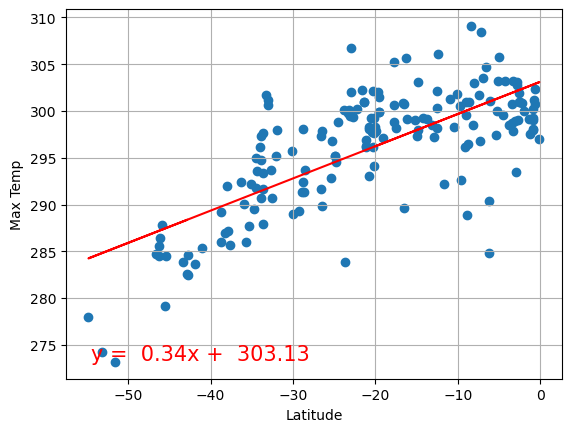

'The r-value is: 0.7250299854596269'

In [19]:
# Linear regression on Southern Hemisphere
south_temp = southern_hemi_df["Max Temp"]
south_x = southern_hemi_df["Lat"]
plot_lin_reg(south_x, south_temp, xlabel="Latitude", ylabel="Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is a pretty strong correlation between latitude and max temperature. According to the data, as you get closer to the equator (0 lat) the maximum temperature gets higher.

### Humidity vs. Latitude Linear Regression Plot

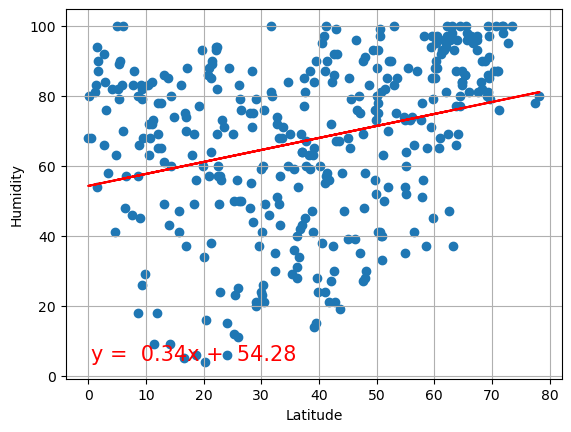

'The r-value is: 0.29205420964714346'

In [20]:
# Northern Hemisphere
north_hum = northern_hemi_df["Humidity"]
plot_lin_reg(north_x, north_hum, xlabel="Latitude", ylabel="Humidity")

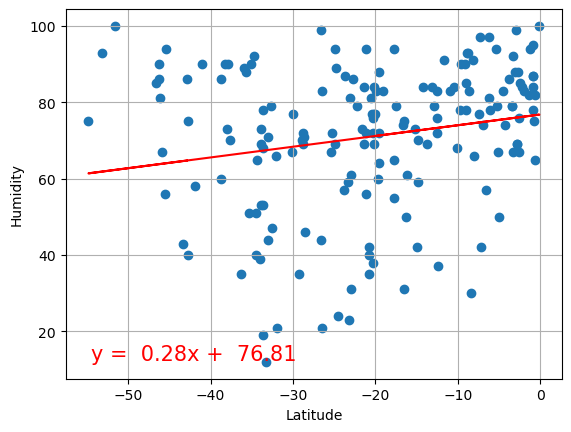

'The r-value is: 0.20049519090489362'

In [21]:
# Southern Hemisphere
south_hum = southern_hemi_df["Humidity"]
plot_lin_reg(south_x,south_hum, xlabel="Latitude", ylabel="Humidity")

There is a much weaker correlation between humidity and latitude, compared to maximum temperature. In this case, higher latitudes have a bit higher humidity across the board.
However, with such a weak correlation, that's not necessarily a correct takeaway.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

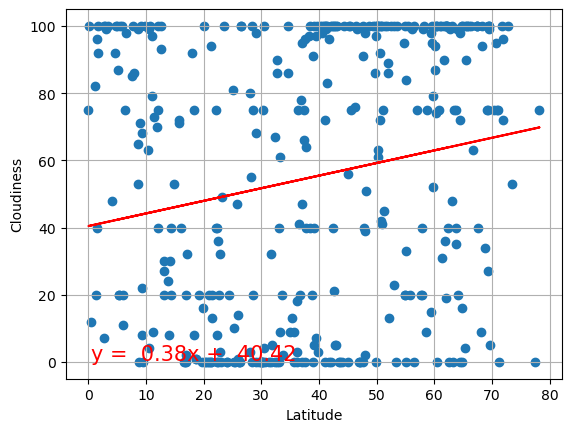

'The r-value is: 0.1885992757631664'

In [22]:
# Northern Hemisphere
north_cloud = northern_hemi_df["Cloudiness"]
plot_lin_reg(north_x, north_cloud, xlabel="Latitude", ylabel="Cloudiness")

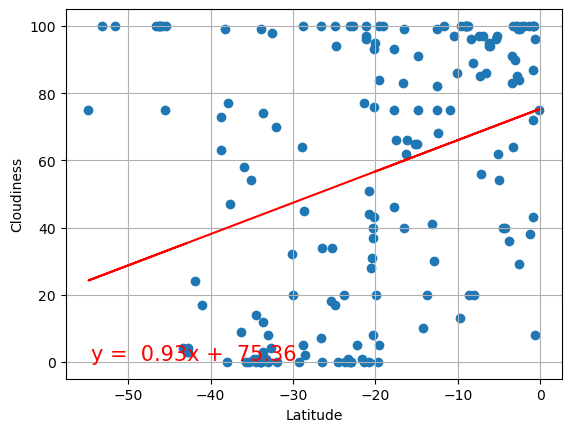

'The r-value is: 0.32666762056118476'

In [23]:
# Southern Hemisphere
south_cloud = southern_hemi_df["Cloudiness"]
plot_lin_reg(south_x, south_cloud, xlabel="Latitude", ylabel="Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Again, there is a pretty weak correlation between the amount of clouds and latitude. I wouldn't make any conclusions on cloudiness of an area based on latitude.

### Wind Speed vs. Latitude Linear Regression Plot

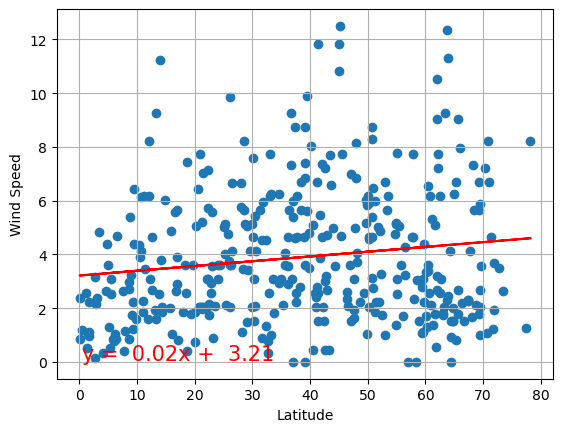

'The r-value is: 0.14451934696288193'

In [24]:
# Northern Hemisphere
north_wind = northern_hemi_df["Wind Speed"]
plot_lin_reg(north_x, north_wind, xlabel="Latitude", ylabel="Wind Speed") 

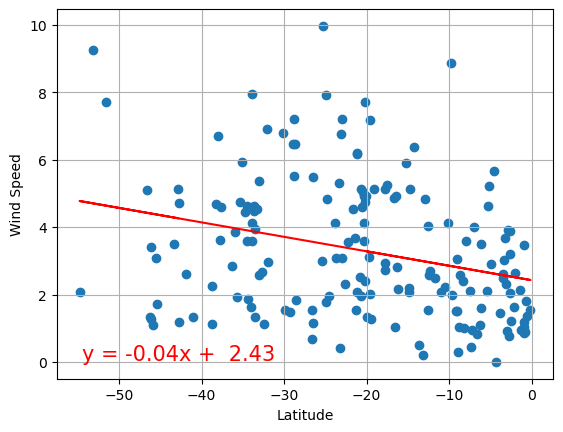

'The r-value is: -0.2867380272557628'

In [25]:
# Southern Hemisphere
south_wind = southern_hemi_df["Wind Speed"]
plot_lin_reg(south_x, south_wind, xlabel="Latitude", ylabel="Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Very weak correlations between wind speed and latitude. Wind speed is pretty evenly distributed with a few maximum values in each hemisphere. North hemi. maxes out around 14, while south hemi. maxes out a bit above 10